In [1]:
import time
import math
import numpy as np
import tensorly as tl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from brokenaxes import brokenaxes
from online_tensor_decomposition import *

In [2]:
results = {}

In [3]:
def plot_local(datasets, name):
    def plot():
        points  = []
        for dataset in datasets:
            if dataset in results:
                for lib in libs:
                    if lib in results[dataset]:
                        point = [lib, dataset, [results[dataset][lib][3]], [results[dataset][lib][1]]]
                        points.append(point)


#         print(points)

        bax = brokenaxes(xscale='log')
#             bax = brokenaxes(xscale='log', subplot_spec=sps1)
        for point in points :
            lib, data, x, y = point
            if len(x) != 0:
                if x[0] != 0 and y[0] != 0:
                    bax.plot(x, y, label=lib,
                             c= dct[lib],  marker=dct1[data],
                            mfc='none', ms = 10, mew = 1.8)
#         bax.set_ylim([0.97,0.99])
#         bax.set_yscale('log') 
#         bax.set_xscale('log')


#         bax.tick_params(axis = 'y', labelsize =8)
        bax.set_ylabel('Average of Local Fitness', size = 10, labelpad=50)
        bax.set_xlabel('Average of Local Running Time (s)', size = 10, labelpad=25)  ### Labelpad > space btw xaxis and xlabel
        plt.subplots_adjust(hspace=0.1, bottom = 0.4 , left = 0.23, top = 0.9) ### Plot to remove whitespace of plot 
#         plt.show()
        plt.savefig(f'./plots/{name}_local.pdf',bbox_inches = 'tight', pad_inches = 0)

    markers = ("o", "x", "s", "^", "4")
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')

    libs = ("dao", "dtd", "ocp", 'fcp')
    f = lambda m,c: plt.plot([],[], color=c, marker = m,
                             mfc='none', ms = 10, mew = 1.8,
                                ls="none")[0]
    f2 = lambda c: plt.plot([],[],marker='.', color=c, )[0]

    dct = {}
    dct1 = {}

    for color, lib in zip(colors, libs):
        dct[lib] = color

    for data, marker in zip(datasets, markers):
        dct1[data] = marker
    
    fig = plt.figure(figsize = (4, 4), dpi = 150,)   ### figsize = (row, col), dpi > resolution(?)
#     sps1, sps2 = GridSpec(1,2)
    plot()

In [4]:
def plot_global(datasets, name):
    def plot():
        points  = []
        for dataset in datasets:
            if dataset in results:
                for lib in libs:
                    if lib in results[dataset]:
                        point = [lib, dataset, [results[dataset][lib][2]], [results[dataset][lib][0]]]
                        points.append(point)
#         print(points)

        bax = brokenaxes(xscale='log')
#             bax = brokenaxes(xscale='log', subplot_spec=sps2)
        for point in points :
            lib, data, x, y = point
            if len(x) != 0:
                if x[0] != 0 and y[0] != 0:
                    bax.plot(x, y, label=lib,
                             c= dct[lib],  marker=dct1[data],
                            mfc='none', ms = 10, mew = 1.8)

#         bax.set_ylim([0.97,0.99])
#         bax.set_xscale('log') 
        bax.set_ylabel('Global Fitness', size = 10, labelpad=50)
        bax.set_xlabel('Global Running Time (s)', size = 10, labelpad=25)  ### Labelpad > space btw xaxis and xlabel
        plt.subplots_adjust(hspace=0.1, bottom = 0.4 , left = 0.23, top = 0.9) ### Plot to remove whitespace of plot 
#         plt.show()
        plt.savefig(f'./plots/{name}_global.pdf',bbox_inches = 'tight', pad_inches = 0)

    markers = ("o", "x", "s", "^", "4")
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')

    libs = ("dao", "dtd", "ocp", 'fcp')
    f = lambda m,c: plt.plot([],[], color=c, marker = m,
                             mfc='none', ms = 10, mew = 1.8,
                                ls="none")[0]
    f2 = lambda c: plt.plot([],[],marker='.', color=c, )[0]

    dct = {}
    dct1 = {}

    for color, lib in zip(colors, libs):
        dct[lib] = color

    for data, marker in zip(datasets, markers):
        dct1[data] = marker
    
    fig = plt.figure(figsize = (4, 4), dpi = 150,)   ### figsize = (row, col), dpi > resolution(?)
#     sps1, sps2 = GridSpec(1,2)
    plot()

In [5]:
def plot_mem(datasets, name):
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')

    libs = ("dao", "dtd", "ocp", 'fcp')

    # create plot
    fig = plt.figure(figsize = (4, 4), dpi = 150,)
    index = np.arange(5)
    bar_width = 0.2

    for i, (color, lib) in enumerate(zip(colors, libs)):
        mem_list = [results[dataset][lib][4] for dataset in datasets]
        rects1 = plt.bar(index + bar_width*i, mem_list, bar_width, color=color, label=lib)

    plt.xlabel('Datasets')
    plt.ylabel('Memory Usage (byte)')
    plt.yscale('log')
    plt.xticks(index + bar_width*1.5, ('Synthetic', 'Video', 'Stock', 'Hall', 'Korea'))

    plt.savefig(f'./plots/{name}_mem.pdf', bbox_inches = 'tight', pad_inches = 0)
    

### Synthetic Data

In [6]:
import csv
synthetic_data = tl.tensor(np.zeros([1000, 10, 20, 30], dtype='f'))

for i in range(200):
    start = time.time()
    with open('../Data/synthetic_data/data_normal/data{}.tensor'.format(i)) as file:
        reader = csv.reader(file, delimiter='\t')    
        for row in reader:
            indices = [[index] for index in np.int64(np.asarray(row[:-1]))-1]
            synthetic_data[tuple(indices)] = np.double(row[-1])
    print('>> synthetic_data{} loaded '.format(i), time.time() - start)

>> synthetic_data0 loaded  0.8089854717254639
>> synthetic_data1 loaded  0.7399237155914307
>> synthetic_data2 loaded  0.8001923561096191
>> synthetic_data3 loaded  0.7704532146453857
>> synthetic_data4 loaded  0.7719612121582031
>> synthetic_data5 loaded  0.7916927337646484
>> synthetic_data6 loaded  0.8202805519104004
>> synthetic_data7 loaded  0.7268617153167725
>> synthetic_data8 loaded  0.7543210983276367
>> synthetic_data9 loaded  0.9587233066558838
>> synthetic_data10 loaded  0.8762302398681641
>> synthetic_data11 loaded  0.746635913848877
>> synthetic_data12 loaded  0.9298222064971924
>> synthetic_data13 loaded  0.8807938098907471
>> synthetic_data14 loaded  0.7888236045837402
>> synthetic_data15 loaded  0.8984696865081787
>> synthetic_data16 loaded  0.7626657485961914
>> synthetic_data17 loaded  0.8112266063690186
>> synthetic_data18 loaded  0.7738268375396729
>> synthetic_data19 loaded  0.7536637783050537
>> synthetic_data20 loaded  0.7428748607635498
>> synthetic_data21 load

### Sample Video (done)

In [ ]:
import csv
sample_video = tl.tensor(np.zeros([205, 240, 320, 3], dtype='d'))

for i in range(41):
    start = time.time()
    with open('../Data/sample_video/data/video{}.tensor'.format(i)) as file:
        reader = csv.reader(file, delimiter='\t')    
        for row in reader:
            indices = [[index] for index in np.int64(np.asarray(row[:-1]))-1]
            sample_video[tuple(indices)] = np.double(row[-1])
    print('>> sample_video{} loaded '.format(i), time.time() - start)

### Stock

In [ ]:
import csv

stock2_tensor = tl.tensor(np.zeros([3089, 140, 5], dtype='d'))
start = time.time()
with open('../Data/stock/KOSPI140.tensor') as file:
    reader = csv.reader(file, delimiter='\t')    
    for row in reader:
        indices = np.asarray([index for index in np.int64(np.asarray(row[:-1]))])[[1, 0, 2]]
        stock2_tensor[tuple(indices)] = np.double(row[-1])
print('>> stock2_tensor loaded ', time.time() - start)

### Hall from OLSTEC (done)
* `hall1-200.mat`: 144 * 176 * 200 => 200 * 144 * 176
* `hall_144x100_frame2900-3899_pan.mat`: 144 * 100 * 1000 => 1000 * 144 * 100

In [ ]:
from scipy.io import loadmat
import h5py

hall1 = loadmat('../Data/hall/hall1-200.mat')['XO']
hall1 = np.moveaxis(hall1, -1, 0)
hall1 = hall1.reshape(200, 144, 176, order='F')

with h5py.File('../Data/hall/hall_144x100_frame2900-3899_pan.mat', 'r') as f:
    hall2 = np.array(f['X0'])
    hall2 = hall2.reshape(1000, 144, 100, order='F')
    
hall1_tensor = tl.tensor(hall1, dtype='f')
hall2_tensor = tl.tensor(hall2, dtype='f')
print(hall1_tensor.shape, hall2_tensor.shape)
# make_video(hall1, 'hall1.avi', False)
# make_video(hall2, 'hall2.avi', False)

### Air Quality Tensor
* `<date> <location> <air pollutants> (measurement)`
* Beijing Air Quality
  * 2,454,305 out of 2,524,536 (35,063 * 12 * 6)
* Korea Air Quality
  * 11,270,028 out of 18,368,364 (9,478 * 323 * 6)
* Madrid Air Quality
  * 8,036,759 out of 21,587,328 (64,248 * 24 * 14)

In [ ]:
# beijing_df = pd.read_csv('../../Data/air_quality/BeijingAirQuality/beijing.tensor', delimiter='\t', header=None)
korea_df = pd.read_csv('../../Data/air_quality/KoreaAirQuality/korea_airquality.tensor', delimiter='\t', header=None)
# madrid_df = pd.read_csv('../../Data/air_quality/MadridAirQuality/1hour_madrid.tensor', delimiter='\t', header=None)

In [ ]:
def get_tensor(df):
    start = time.time()

    dims = df[[0,1,2]].max()+1
    tensor = np.empty(dims) * np.nan
    tensor.shape

    for i, row in df.iterrows():
        indices = [[index] for index in np.int64(np.asarray(row[:-1]))]
        tensor[tuple(indices)] = np.double(row[3])

    avg = []
    for i in range(tensor.shape[2]):
        avg.append(np.nanmean(tensor[:,:,i]))
    inds = np.where(np.isnan(tensor))
    for ind in zip(inds[0], inds[1], inds[2]):
        tensor[ind] = avg[ind[-1]]
        
    print(time.time() - start)
    return tensor

In [ ]:
# beijing_tensor = get_tensor(beijing_df)
korea_tensor = get_tensor(korea_df)
# madrid_tensor = get_tensor(madrid_df)

---
# Experiment #1

In [14]:
# synthetic
(n_iter, ul, ll) = (1, 1.2, 1.1)
tensor_stream = create_tensor_stream(synthetic_data, start_to_stream=10, batch_sizes=np.full((99), 10, dtype=int))
results['synthetic-10'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=10, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['synthetic-20'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['synthetic-30'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['synthetic-40'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=40, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['synthetic-50'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=50, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

-----------------------------------
making init decomposition result: 1.3668465614318848

 >> dao rank-10 n_iter-1
||A-B||: 220010.91446597048
split: 4 refine: 0
global fitness 0.1042091793123231
local fitness 0.10413134886588449
global running time 9.760029792785645
local running time 0.0205213614184447

 >> dtd rank-10 n_iter-1
||A-B||: 239979.75862519085
global fitness 0.022904543399184796
local fitness 0.022551541216297544
global running time 5.436617374420166
local running time 0.03856022671015576

 >> ocp rank-10 n_iter-1
||A-B||: 239986.0524179472
global fitness 0.022878917753329286
local fitness 0.02256404947556412
global running time 2.425773859024048
local running time 0.008417266787904682

 >> fcp rank-10 n_iter-1
global fitness 0.04114999325418611
global running time 14.578824281692505
-----------------------------------
making init decomposition result: 2.0770347118377686

 >> dao rank-20 n_iter-1
||A-B||: 194672.07435972604
split: 4 refine: 0
global fitness 0.207378153584

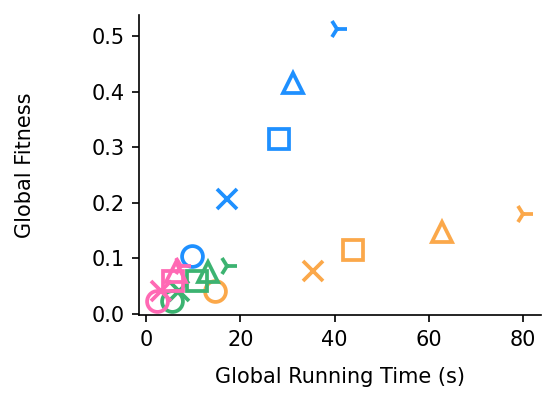

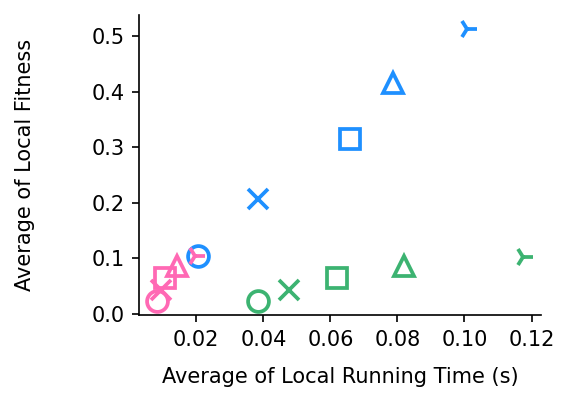

In [50]:
datasets = ('synthetic-10', 'synthetic-20', 'synthetic-30', 'synthetic-40', 'synthetic-50')
plot_global(datasets, 'E1_synthetic')
plot_local(datasets, 'E1_synthetic')

In [ ]:
## video
(n_iter, ul, ll) = (1, 6, 2)
tensor_stream = create_tensor_stream(sample_video, start_to_stream=5, batch_sizes=np.full((40), 5, dtype=int))
results['video-10'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=10, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['video-20'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['video-30'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['video-40'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=40, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['video-50'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=50, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

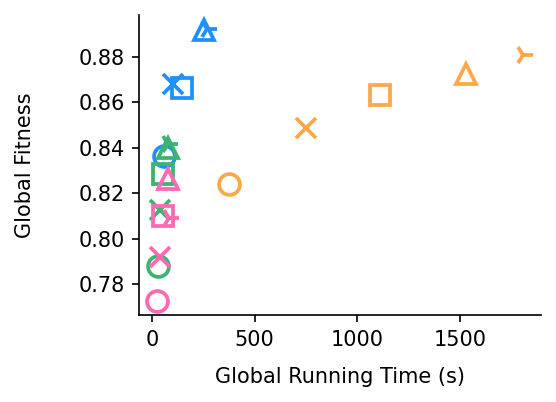

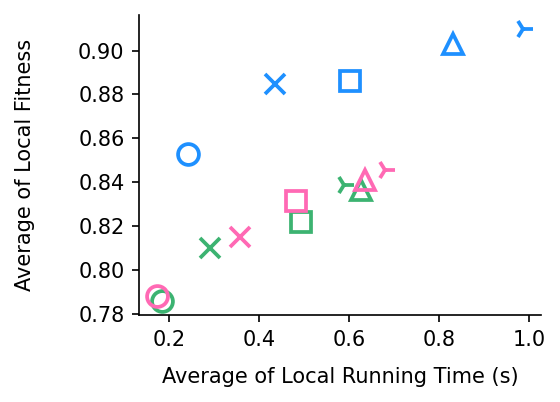

In [51]:
datasets = ('video-10', 'video-20', 'video-30', 'video-40', 'video-50')
plot_global(datasets, 'E1_video')
plot_local(datasets, 'E1_video')

In [35]:
# stock
(n_iter, ul, ll) = (1, 6, 5)
tensor_stream = create_tensor_stream(stock2_tensor, start_to_stream=5, batch_sizes=np.full((1028), 3, dtype=int))
results['stock-10'] = online_tensor_decomposition('stock', stock2_tensor, tensor_stream, rank=10, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['stock-15'] = online_tensor_decomposition('stock', stock2_tensor, tensor_stream, rank=15, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['stock-20'] = online_tensor_decomposition('stock', stock2_tensor, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['stock-25'] = online_tensor_decomposition('stock', stock2_tensor, tensor_stream, rank=25, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['stock-30'] = online_tensor_decomposition('stock', stock2_tensor, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

/home/lucetre/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


-----------------------------------
making init decomposition result: 0.5143296718597412

 >> dao rank-10 n_iter-1
||A-B||: 31.546340919976746
split: 23 refine: 1
global fitness 0.9760293554000488
local fitness 0.9716202395056852
global running time 14.256234645843506
local running time 0.004165738473142631

 >> dtd rank-10 n_iter-1
||A-B||: 32.18550447972118
global fitness 0.9755436837790282
local fitness 0.9707618729301601
global running time 7.189641237258911
local running time 0.005263362181325831

 >> ocp rank-10 n_iter-1
||A-B||: 32.249601693665646
global fitness 0.975494979191095
local fitness 0.9707790639528359
global running time 2.865422010421753
local running time 0.001156739919565995

 >> fcp rank-10 n_iter-1
global fitness 0.9761093527059761
global running time 22.387821674346924
-----------------------------------
making init decomposition result: 0.48658061027526855

 >> dao rank-15 n_iter-1
||A-B||: 30.693861056488327
split: 23 refine: 1
global fitness 0.976677116479158

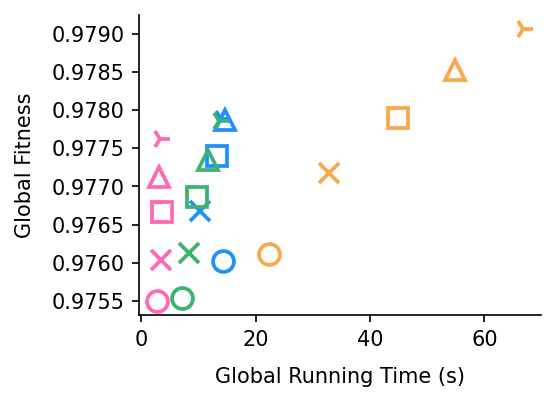

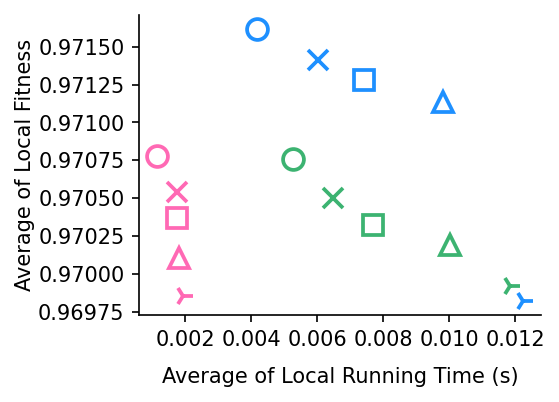

In [52]:
datasets = ('stock-10', 'stock-15', 'stock-20', 'stock-25', 'stock-30')
plot_global(datasets, 'E1_stock')
plot_local(datasets, 'E1_stock')

In [38]:
# hall
(n_iter, ul, ll) = (1, 0.5, 0.1)
tensor_stream = create_tensor_stream(hall1_tensor, start_to_stream=10, batch_sizes=np.full((19), 10, dtype=int))
results['hall-10'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=15, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['hall-15'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['hall-20'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['hall-25'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=25, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['hall-30'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

-----------------------------------
making init decomposition result: 1.317431926727295

 >> dao rank-15 n_iter-1
||A-B||: 47829.288182663404
split: 4 refine: 0
global fitness 0.8648026801503336
local fitness 0.8712727780634535
global running time 9.476220607757568
local running time 0.057375707124408926

 >> dtd rank-15 n_iter-1
||A-B||: 50683.20025092898
global fitness 0.8567356300775294
local fitness 0.8586915834601675
global running time 2.1645705699920654
local running time 0.04149763207686575

 >> ocp rank-15 n_iter-1
||A-B||: 51184.39585816277
global fitness 0.8553189185730711
local fitness 0.8607130980846978
global running time 1.6393625736236572
local running time 0.012916339071173417

 >> fcp rank-15 n_iter-1
global fitness 0.8653606435357271
global running time 38.84004235267639
-----------------------------------
making init decomposition result: 2.5416574478149414

 >> dao rank-20 n_iter-1
||A-B||: 45286.84615456044
split: 4 refine: 3
global fitness 0.871989309120431
local

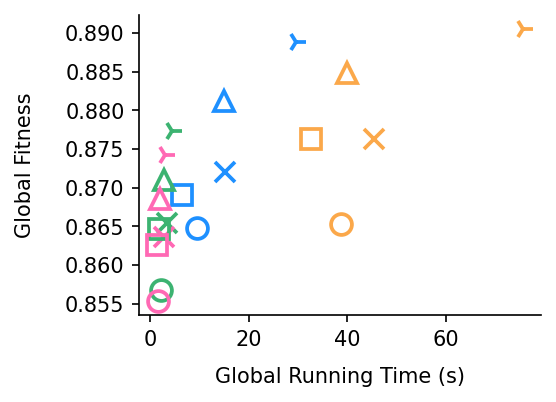

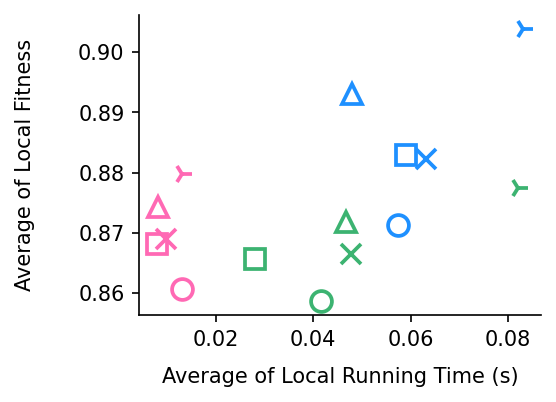

In [53]:
datasets = ('hall-10', 'hall-15', 'hall-20', 'hall-25', 'hall-30')
plot_global(datasets, 'E1_hall')
plot_local(datasets, 'E1_hall')

/home/lucetre/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


-----------------------------------
making init decomposition result: 1.678441047668457

 >> dao rank-10 n_iter-1
||A-B||: 19909.68442673556
split: 7 refine: 3
global fitness 0.7993827325425843
local fitness 0.8025862239930354
global running time 26.503920555114746
local running time 0.03831460374466916
memory usage 536

 >> dtd rank-10 n_iter-1
||A-B||: 22345.6948267412
global fitness 0.7748366001442866
local fitness 0.7847574419493298
global running time 10.856868267059326
local running time 0.032293852339399624
memory usage 424

 >> ocp rank-10 n_iter-1
||A-B||: 22735.031331574635
global fitness 0.7709135030199434
local fitness 0.7824665435950975
global running time 9.951076745986938
local running time 0.019790771159719913
memory usage 1696

 >> fcp rank-10 n_iter-1
global fitness 0.7898128434189982
global running time 201.87358951568604
memory usage 944


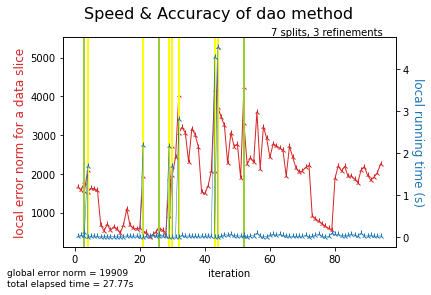

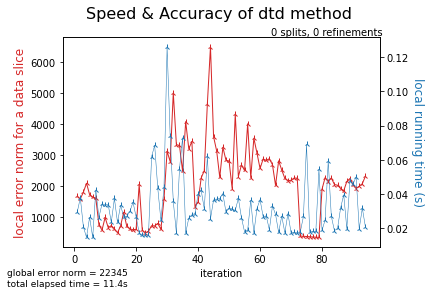

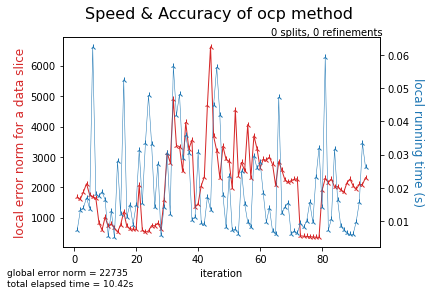

In [58]:
# korea air-quality
(n_iter, ul, ll) = (1, 2, 1.3)
tensor_stream = create_tensor_stream(korea_tensor, start_to_stream=79, batch_sizes=np.full((94), 100, dtype=int))
results['korea-10'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=10, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['korea-15'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=15, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['korea-20'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['korea-25'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=25, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['korea-30'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

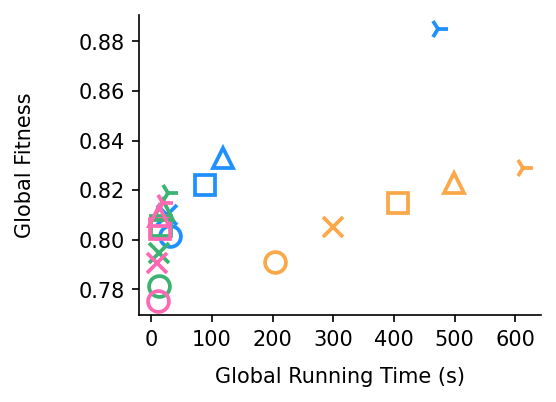

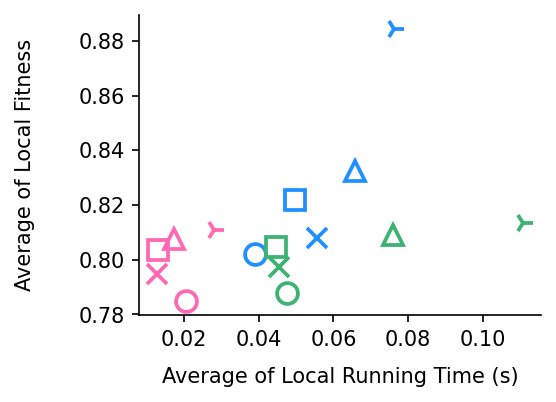

In [54]:
datasets = ('korea-10', 'korea-15', 'korea-20', 'korea-25', 'korea-30')
plot_global(datasets, 'E1_korea')
plot_local(datasets, 'E1_korea')

---
# Experiment #2

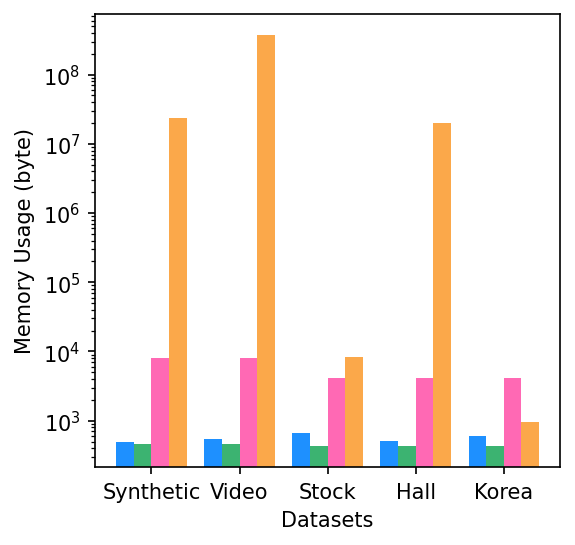

In [49]:
plot_mem(('synthetic-30', 'video-30', 'stock-20', 'hall-20', 'korea-20'), 'E2')

---
# Experiment #5

In [73]:
def plot_E5(dataset):
    verbose_list = results[5]
    split_points, refine_points = results[6]
    color = 'tab:red'
    fig, ax1 = plt.subplots()
    #         plt.xticks(rotation=45)
    ax1.set_ylabel('Local Error Norm', color=color, fontsize=12)
    ax1.set_xlabel('# of Income Slices', fontsize=12)
    #         ax1.xaxis.set_label_position('top')
    ax1.plot(verbose_list[:,0], verbose_list[:,2], linewidth=1, marker="2", color=color)

    for p in refine_points:
        ax1.axvline(p,  label='line: {}'.format(p), c='yellowgreen', linewidth=2)
    for p in split_points:
        ax1.axvline(p,  label='line: {}'.format(p), c='yellow', linewidth=2)

    color = 'tab:blue'
    ax2 = ax1.twinx()
    ax2.set_ylabel('Local Running Time (s)', color=color,  rotation=270, fontsize=12, labelpad=15)
    ax2.plot(verbose_list[:,0], verbose_list[:,1], linewidth=0.5, marker="2", color=color)
    fig.tight_layout()

    plt.savefig('plots/E5_{}.pdf'.format(dataset), bbox_inches='tight', pad_inches=0)

-----------------------------------
making init decomposition result: 2.1335721015930176

 >> dao rank-10 n_iter-1
||A-B||: 219062.6231990529
split: 4 refine: 0
global fitness 0.10807021781718529
local fitness 0.10807468145563637
global running time 13.040777444839478
local running time 0.030366030606356533
memory usage 496
-----------------------------------
making init decomposition result: 13.38529634475708

 >> dao rank-10 n_iter-1
||A-B||: 145726.94973784577
split: 3 refine: 9
global fitness 0.8367388647707467
local fitness 0.8530935455915873
global running time 67.54739189147949
local running time 0.2307632327079773
memory usage 552


/home/lucetre/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


-----------------------------------
making init decomposition result: 0.8301372528076172

 >> dao rank-10 n_iter-1
||A-B||: 31.46999184110453
split: 23 refine: 2
global fitness 0.976087369628698
local fitness 0.9716711276387572
global running time 29.608086347579956
local running time 0.011754160493264403
memory usage 672
-----------------------------------
making init decomposition result: 5.148696184158325

 >> dao rank-20 n_iter-1
||A-B||: 46376.63661246129
split: 3 refine: 5
global fitness 0.8689088378296344
local fitness 0.8823658535800475
global running time 23.860673904418945
local running time 0.2040539917192961
memory usage 504


/home/lucetre/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


-----------------------------------
making init decomposition result: 1.9809606075286865

 >> dao rank-10 n_iter-1
||A-B||: 19821.69372381558
split: 7 refine: 1
global fitness 0.8002693590708159
local fitness 0.8009837033959595
global running time 32.53963088989258
local running time 0.043340906183770365
memory usage 536


{'dao': [0.8002693590708159,
  0.8009837033959595,
  32.53963088989258,
  0.043340906183770365,
  536]}

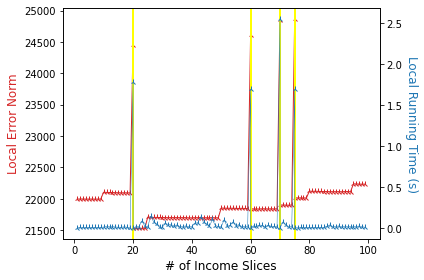

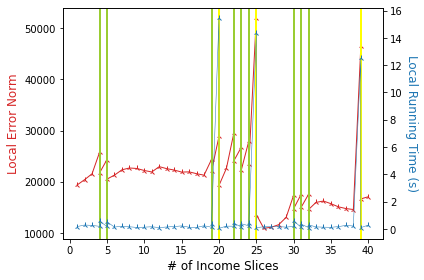

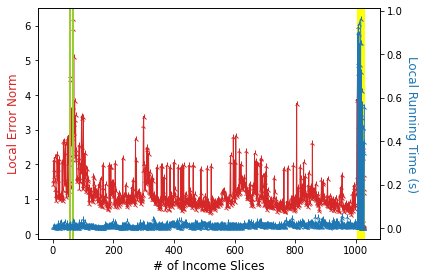

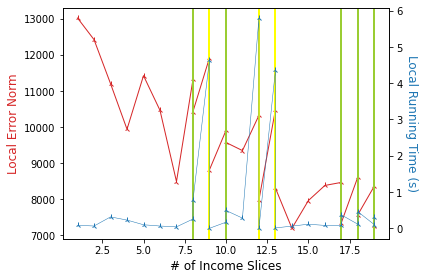

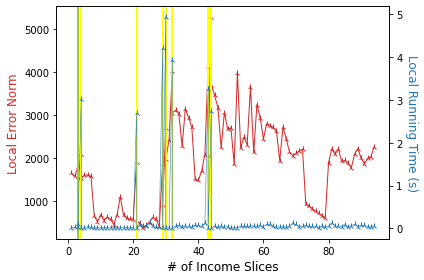

In [72]:
results['synthetic-10']['dao']
results['video-10']['dao']
results['stock-10']['dao']
results['hall-20']['dao']
results['korea-10']['dao']

---
### Batch size

In [33]:
def create_tensor_stream(X, start_to_stream, batch_sizes=[]):
    if start_to_stream < 0:
        batch_size = int(-start_to_stream)
        start_to_stream = X.shape[0] % batch_size
        if start_to_stream == 0:
            start_to_stream = batch_size
            batch_sizes = np.full(((X.shape[0]-batch_size) // batch_size), batch_size, dtype=int)
        else:
            batch_sizes = np.full((X.shape[0] // batch_size), batch_size, dtype=int)
        print(start_to_stream, batch_sizes)
    
    total_batch_size = np.sum(batch_sizes)
    if X.shape[0] != start_to_stream + total_batch_size:
        raise ValueError('Total batch size should be the size of streaming part of the tensor.')
    
    X_stream = [X[:start_to_stream]]
    batch_start = start_to_stream
    for batch_size in batch_sizes:
        batch_end = batch_start + batch_size
        X_stream.append(X[batch_start:batch_end])
        batch_start = batch_end
    return np.asarray(X_stream)

In [ ]:
(n_iter, ul, ll) = (1, 2, 1.3)
tensor_stream = create_tensor_stream(korea_tensor, start_to_stream=-5)
tensor_stream = create_tensor_stream(korea_tensor, start_to_stream=-10)
tensor_stream = create_tensor_stream(korea_tensor, start_to_stream=-50)
# tensor_stream = create_tensor_stream(korea_tensor, start_to_stream=-100)